In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv("coffee-prices-historical-data.csv")

In [33]:
df

,date,value
0,1973-08-20,0.6735
1,1973-08-21,0.6710
2,1973-08-22,0.6580
3,1973-08-23,0.6675
4,1973-08-24,0.6660
...,...,...
12558,21.08.2023,NaN
12559,22.08.2023,NaN
12560,23.08.2023,NaN
12561,24.08.2023,NaN


In [36]:
mean_value = df[' value'].mean()
df[' value'].fillna(mean_value, inplace=True)

In [35]:
print(df.columns)

Index(['date', ' value'], dtype='object')


In [37]:
X = df.drop('date', axis=1)
Y = df[' value']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
import matplotlib.pyplot as plt
from datetime import datetime

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
model.fit(X_train,Y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [48]:
df


,date,value
0,1973-08-20,0.673500
1,1973-08-21,0.671000
2,1973-08-22,0.658000
3,1973-08-23,0.667500
4,1973-08-24,0.666000
...,...,...
12558,21.08.2023,1.289773
12559,22.08.2023,1.289773
12560,23.08.2023,1.289773
12561,24.08.2023,1.289773


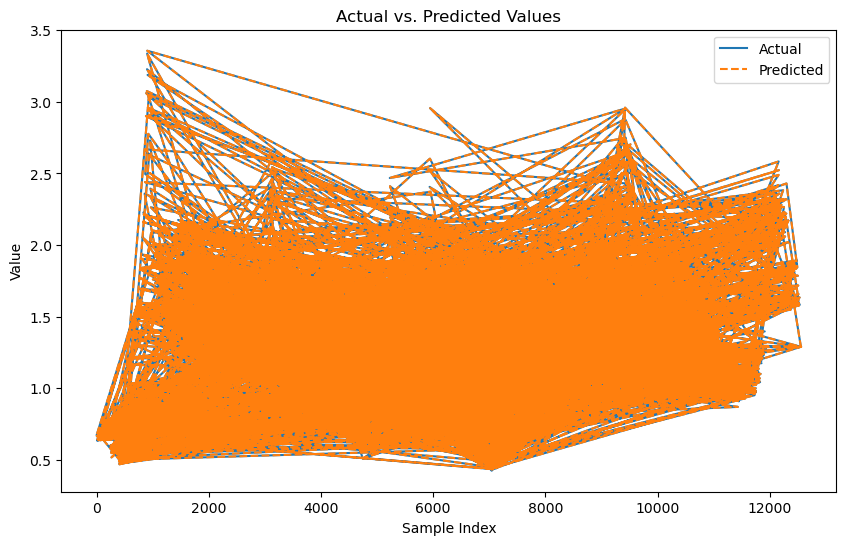

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test.values, label='Actual')
plt.plot(Y_test.index, y_pred, label='Predicted', linestyle='dashed')
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,y_pred)

In [53]:
print(f"R-squared (R2): {r2:.4f}")

R-squared (R2): 1.0000


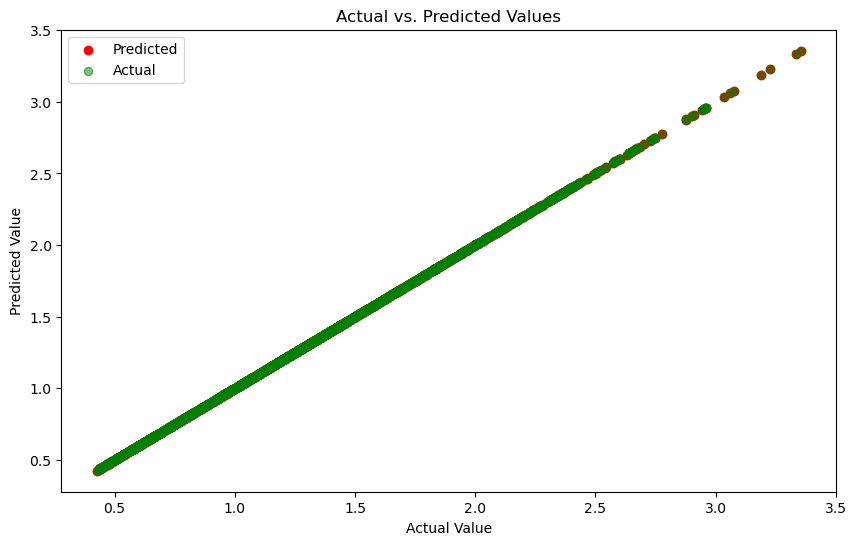

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='red', label='Predicted')
plt.scatter(Y_test, Y_test, color='green', label='Actual', alpha=0.5)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()